In [1]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load pre-trained EfficientNetB3 model
model = EfficientNetB3(weights='imagenet', include_top=False, pooling='avg')

In [3]:
import os

def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features.flatten()

# Path to your dataset
dataset_path = 'images/'
image_features = {}
for img_name in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, img_name)
    features = extract_features(img_path, model)
    image_features[img_name] = features
    

1/1 [==============================] - 0s 193ms/step


In [4]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Ask the user to upload an image
root = Tk()
#root.withdraw()  # Hide the root window
initial_dir = os.getcwd()
query_image_path = askopenfilename(initialdir=initial_dir, title='Select an image file')
root.destroy()  # Close the Tkinter window

query_features = extract_features(query_image_path, model)
print(query_features.shape)

1/1 [==============================] - 0s 201ms/step
(1536,)


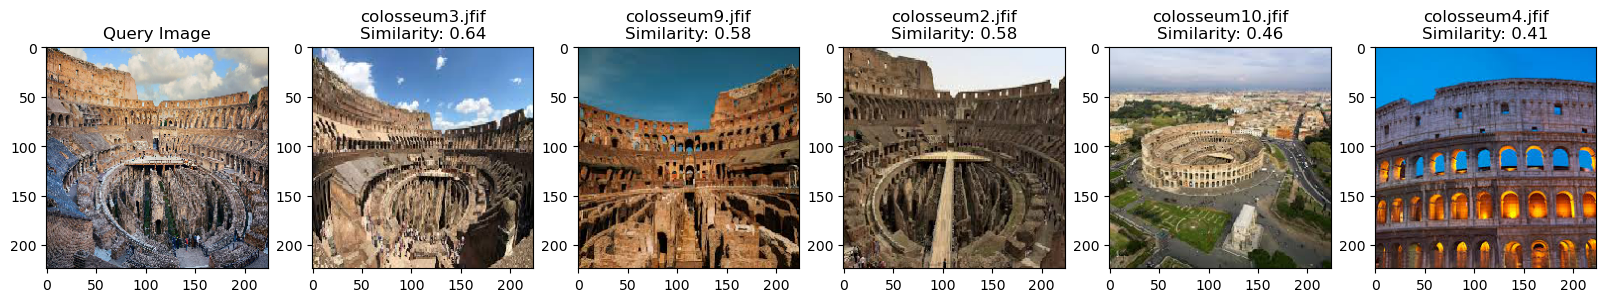

In [5]:
from scipy.spatial.distance import cosine

def cosine_similarity(feature1, feature2):
    return 1 - cosine(feature1, feature2)

def find_top_matches(query_features, image_features, top_n=5):
    similarities = {}
    for img_name, features in image_features.items():
        similarity = cosine_similarity(query_features.flatten(), features.flatten())
        similarities[img_name] = similarity
    sorted_similarities = sorted(similarities.items(), key=lambda item: item[1], reverse=True)
    return sorted_similarities[:top_n]

top_n = 5
top_matches = find_top_matches(query_features, image_features, top_n)


fig, axes = plt.subplots(1, top_n+1, figsize=(20, 10))
query_img = image.load_img(query_image_path, target_size=(224, 224))
axes[0].imshow(query_img)
axes[0].set_title('Query Image')

for i, (img_name, similarity) in enumerate(top_matches):
    img_path = os.path.join(dataset_path, img_name)
    matched_img = image.load_img(img_path, target_size=(224, 224))
    axes[i+1].imshow(matched_img)
    axes[i+1].set_title(f"{img_name}\nSimilarity: {similarity:.2f}")

plt.show()

1/1 [==============================] - 0s 180ms/step


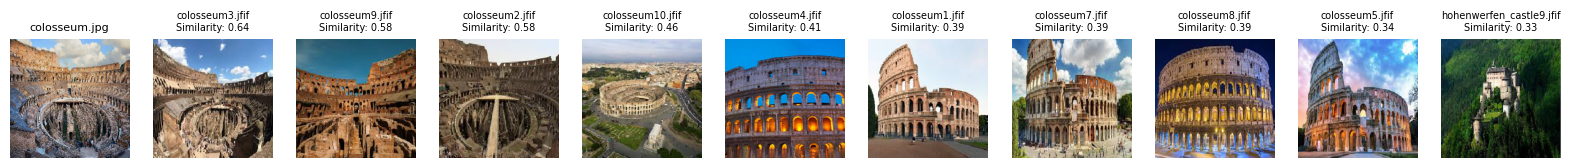

Correct matches for colosseum.jpg: 9/10
1/1 [==============================] - 0s 196ms/step


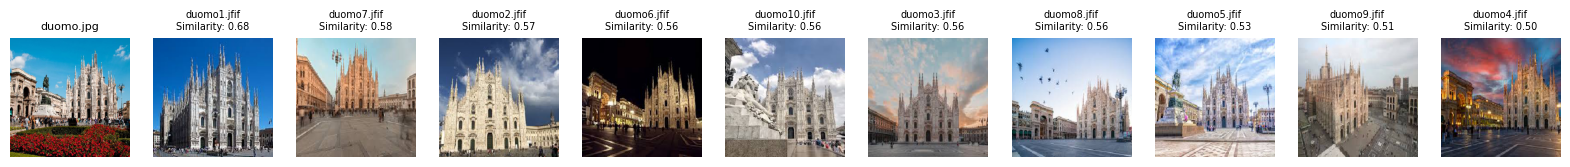

Correct matches for duomo.jpg: 10/10
1/1 [==============================] - 0s 190ms/step


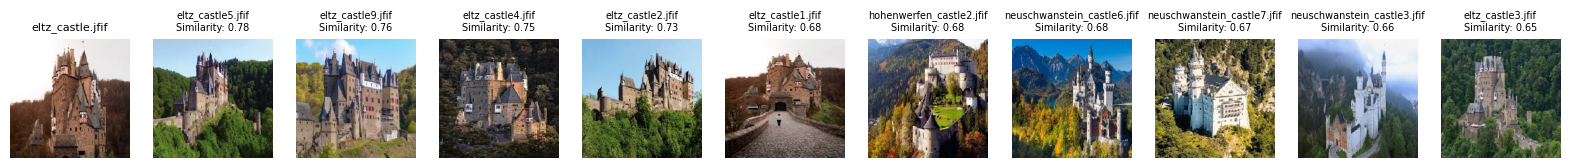

Correct matches for eltz_castle.jfif: 6/10
1/1 [==============================] - 0s 197ms/step


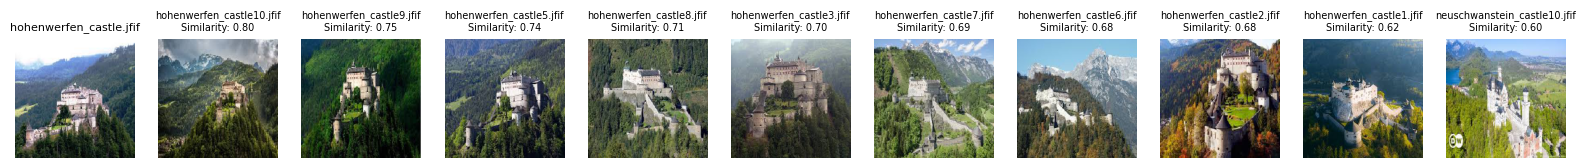

Correct matches for hohenwerfen_castle.jfif: 9/10
1/1 [==============================] - 0s 183ms/step


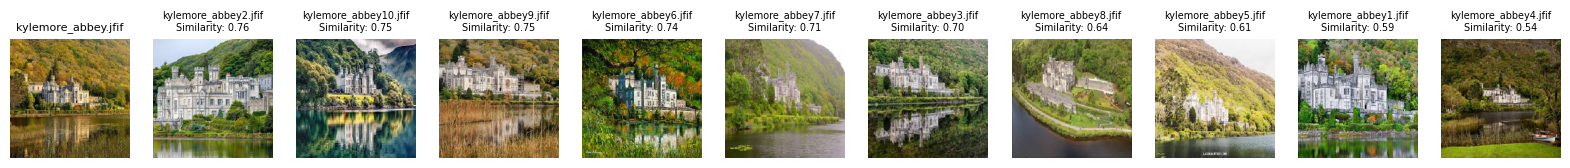

Correct matches for kylemore_abbey.jfif: 10/10
1/1 [==============================] - 0s 192ms/step


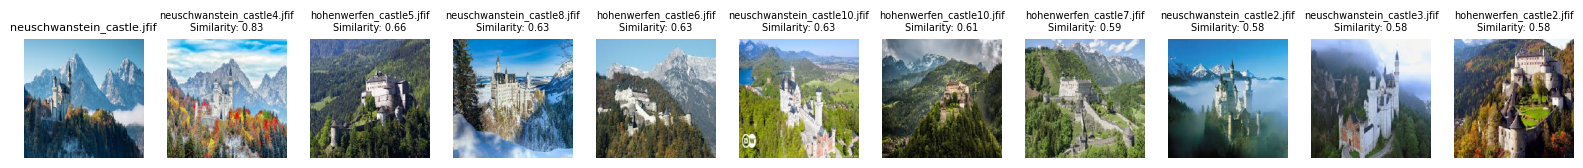

Correct matches for neuschwanstein_castle.jfif: 5/10
Total accuracy: 81.67%


In [6]:
# Evaluate and plot results
def evaluate_and_plot(test_folder, image_features, model, top_n = 5):
    total_correct = 0
    total_images = 0
    for test_img_name in os.listdir(test_folder):
        test_img_path = os.path.join(test_folder, test_img_name)
        query_features = extract_features(test_img_path, model)
        top_matches = find_top_matches(query_features, image_features, top_n = top_n)
        
        correct_matches = 0
        query_prefix = test_img_name.split('.')[0]
        
        fig, axes = plt.subplots(1, top_n+1, figsize=(20, 10))
        query_img = image.load_img(test_img_path, target_size=(224, 224))
        axes[0].imshow(query_img)
        axes[0].set_title(test_img_name, fontsize=8)
        axes[0].axis('off')
        
        for i, (img_name, similarity) in enumerate(top_matches):
            match_prefix = ''.join([c for c in img_name if not c.isdigit()]).split('.')[0]
            if match_prefix == query_prefix:
                correct_matches += 1
            img_path = os.path.join(images_folder, img_name)
            matched_img = image.load_img(img_path, target_size=(224, 224))
            axes[i+1].imshow(matched_img)
            axes[i+1].set_title(f"{img_name}\nSimilarity: {similarity:.2f}", fontsize=7)
            axes[i+1].axis('off')
        
        plt.show()
        print(f'Correct matches for {test_img_name}: {correct_matches}/{top_n}')
        
        total_correct += correct_matches
        total_images += 1

    accuracy = total_correct / (total_images * top_n)
    print(f'Total accuracy: {accuracy * 100:.2f}%')

# Paths
images_folder = 'images'
test_folder = 'test'

# Evaluate and plot results
evaluate_and_plot(test_folder, image_features, model, top_n=10)

In [23]:
import tensorflow as tf
from tensorflow.keras.applications import (
    EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, 
    EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
    EfficientNetV2B0, EfficientNetV2B1, EfficientNetV2B2, EfficientNetV2B3
)
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_input_v1
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input as preprocess_input_v2
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from scipy.spatial.distance import cosine

# Suppress TensorFlow logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow logs

def load_model(version='v1', model_type='B0'):
    if version == 'v1':
        if model_type == 'B0':
            return EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')
        elif model_type == 'B1':
            return EfficientNetB1(weights='imagenet', include_top=False, pooling='avg')
        elif model_type == 'B2':
            return EfficientNetB2(weights='imagenet', include_top=False, pooling='avg')
        elif model_type == 'B3':
            return EfficientNetB3(weights='imagenet', include_top=False, pooling='avg')
        elif model_type == 'B4':
            return EfficientNetB4(weights='imagenet', include_top=False, pooling='avg')
        elif model_type == 'B5':
            return EfficientNetB5(weights='imagenet', include_top=False, pooling='avg')
        elif model_type == 'B6':
            return EfficientNetB6(weights='imagenet', include_top=False, pooling='avg')
        elif model_type == 'B7':
            return EfficientNetB7(weights='imagenet', include_top=False, pooling='avg')
    elif version == 'v2':
        if model_type == 'B0':
            return EfficientNetV2B0(weights='imagenet', include_top=False, pooling='avg')
        elif model_type == 'B1':
            return EfficientNetV2B1(weights='imagenet', include_top=False, pooling='avg')
        elif model_type == 'B2':
            return EfficientNetV2B2(weights='imagenet', include_top=False, pooling='avg')
        elif model_type == 'B3':
            return EfficientNetV2B3(weights='imagenet', include_top=False, pooling='avg')

def extract_features(img_path, model, preprocess_input):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data, verbose=0)  # Suppress prediction logs
    return features.flatten()

def cosine_similarity(feature1, feature2):
    return 1 - cosine(feature1, feature2)

def find_top_matches(query_features, image_features, top_n=5):
    similarities = {}
    for img_name, features in image_features.items():
        similarity = cosine_similarity(query_features.flatten(), features.flatten())
        similarities[img_name] = similarity
    sorted_similarities = sorted(similarities.items(), key=lambda item: item[1], reverse=True)
    return sorted_similarities[:top_n]

def evaluate_model(test_folder, image_features, model, preprocess_input, top_n=5):
    total_correct = 0
    total_images = 0
    for test_img_name in os.listdir(test_folder):
        test_img_path = os.path.join(test_folder, test_img_name)
        query_features = extract_features(test_img_path, model, preprocess_input)
        top_matches = find_top_matches(query_features, image_features, top_n=top_n)
        
        correct_matches = 0
        query_prefix = test_img_name.split('.')[0]
        
        for i, (img_name, similarity) in enumerate(top_matches):
            match_prefix = ''.join([c for c in img_name if not c.isdigit()]).split('.')[0]
            if match_prefix == query_prefix:
                correct_matches += 1
        
        total_correct += correct_matches
        total_images += 1

    accuracy = total_correct / (total_images * top_n)
    return accuracy * 100

# Paths
dataset_path = 'images'
test_folder = 'test'

# Evaluate all models and print results
models_v1 = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
models_v2 = ['B0', 'B1', 'B2', 'B3']

image_features = {}

# Extract features using EfficientNetV1
for model_type in models_v1:
    model = load_model('v1', model_type)
    preprocess_input = preprocess_input_v1
    for img_name in os.listdir(dataset_path):
        img_path = os.path.join(dataset_path, img_name)
        features = extract_features(img_path, model, preprocess_input)
        image_features[img_name] = features
    
    accuracy = evaluate_model(test_folder, image_features, model, preprocess_input, top_n=10)
    print(f'EfficientNetV1 {model_type} Accuracy: {accuracy:.2f}%')

# Extract features using EfficientNetV2
for model_type in models_v2:
    model = load_model('v2', model_type)
    preprocess_input = preprocess_input_v2
    for img_name in os.listdir(dataset_path):
        img_path = os.path.join(dataset_path, img_name)
        features = extract_features(img_path, model, preprocess_input)
        image_features[img_name] = features
    
    accuracy = evaluate_model(test_folder, image_features, model, preprocess_input, top_n=10)
    print(f'EfficientNetV2 {model_type} Accuracy: {accuracy:.2f}%')


EfficientNetV1 B0 Accuracy: 78.33%
EfficientNetV1 B1 Accuracy: 80.00%
31790344/31790344 [==============================] - 9s 0us/step
EfficientNetV1 B2 Accuracy: 71.67%
43941136/43941136 [==============================] - 13s 0us/step
EfficientNetV1 B3 Accuracy: 81.67%
71686520/71686520 [==============================] - 21s 0us/step
EfficientNetV1 B4 Accuracy: 76.67%
115263384/115263384 [==============================] - 33s 0us/step
EfficientNetV1 B5 Accuracy: 68.33%
165234480/165234480 [==============================] - 47s 0us/step
EfficientNetV1 B6 Accuracy: 65.00%
EfficientNetV1 B7 Accuracy: 60.00%
EfficientNetV2 B0 Accuracy: 71.67%
28456008/28456008 [==============================] - 8s 0us/step
EfficientNetV2 B1 Accuracy: 73.33%
35839040/35839040 [==============================] - 10s 0us/step
EfficientNetV2 B2 Accuracy: 76.67%
EfficientNetV2 B3 Accuracy: 71.67%
